In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', 100)
df_oct = pd.read_csv("data/vumonic_india_food_delivery_20231001_20231031.csv", low_memory=False)
df_nov = pd.read_csv("data/vumonic_india_food_delivery_20231101_20231130.csv", low_memory=False)

# with open('data/vumonic_india_food_delivery_20231201_20231231.csv', 'r') as f:
#     first_line = f.readline()
# columns = first_line.replace('\n', '').split(',')
columns = df_nov.columns

df_dec = pd.read_csv('data/vumonic_india_food_delivery_20231201_20231231.csv', usecols=columns, encoding='latin-1', low_memory=False)

df = pd.concat([df_dec, df_nov, df_oct], ignore_index=True)
drop_columns = ['mid', 'sender_id', 'year', 'month', 'day', 'order_promotion_discount', 
                'order_coupon_discount', 'order_seller_discount', 'order_delivery_discount',
                'order_status', 'order_delivery_discount', 'delivery_address_postal_code', 
                'restaurant_address_postal_code', 'user_dob', 'user_address_postal_code', 'user_address_country']
df =  df.drop(drop_columns, axis=1)
df = df[df['user_age'] != 'male']

In [3]:
df.email_timestamp = df.email_timestamp.apply(lambda x: x.split('T')[0])

In [4]:
df['unix_timestamp'] = (pd.to_datetime(df.email_timestamp)- pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

In [108]:
pq = df[['transaction_id', 'email_timestamp', 'product_quantity']].groupby(['email_timestamp', 'transaction_id']).sum().reset_index().groupby('email_timestamp').sum().reset_index().rename(columns={"email_timestamp": "unix_timestamp"})

gg = df.groupby('transaction_id').mean().reset_index()
gg.unix_timestamp = pd.to_datetime(gg.unix_timestamp, unit='s').astype('str').apply(lambda x: x.split(' ')[0])
gg = gg.groupby('unix_timestamp').sum().reset_index()
gg = gg.drop(columns=['product_total',	'order_subtotal',	'order_convenience_fee',	'order_packaging_fee', 'order_tip'])
gg = pd.merge(pq, gg.drop(columns=['product_quantity']))
gg.unix_timestamp = pd.to_datetime(gg.unix_timestamp)
gg

,unix_timestamp,product_quantity,order_delivery_fee,order_taxes,order_membership_fee,order_discount,order_membership_discount,order_amount_paid
0,2023-10-01,12630.0,51842.07,47250.69,2778.0,202924.71,4303.56,1868319.09
1,2023-10-02,10131.0,39238.94,34067.07,1809.0,159798.40,2928.75,1424287.50
2,2023-10-03,7984.0,34843.92,28431.08,2731.0,132406.41,1956.27,1134614.69
3,2023-10-04,8579.0,32777.35,30464.13,1740.0,151256.42,2476.16,1237660.25
4,2023-10-05,8553.0,34922.86,31934.69,3608.0,174713.21,3976.58,1229216.41
...,...,...,...,...,...,...,...,...
87,2023-12-27,8192.0,18782.21,30575.72,2211.0,148122.62,4598.08,1208465.57
88,2023-12-28,8211.0,20901.72,30564.22,1956.0,158544.30,3522.60,1211212.38
89,2023-12-29,9095.0,22725.86,34974.32,2210.0,168346.14,3962.06,1397535.28
90,2023-12-30,10168.0,21699.37,38530.20,2031.0,181148.91,5124.89,1462578.25


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


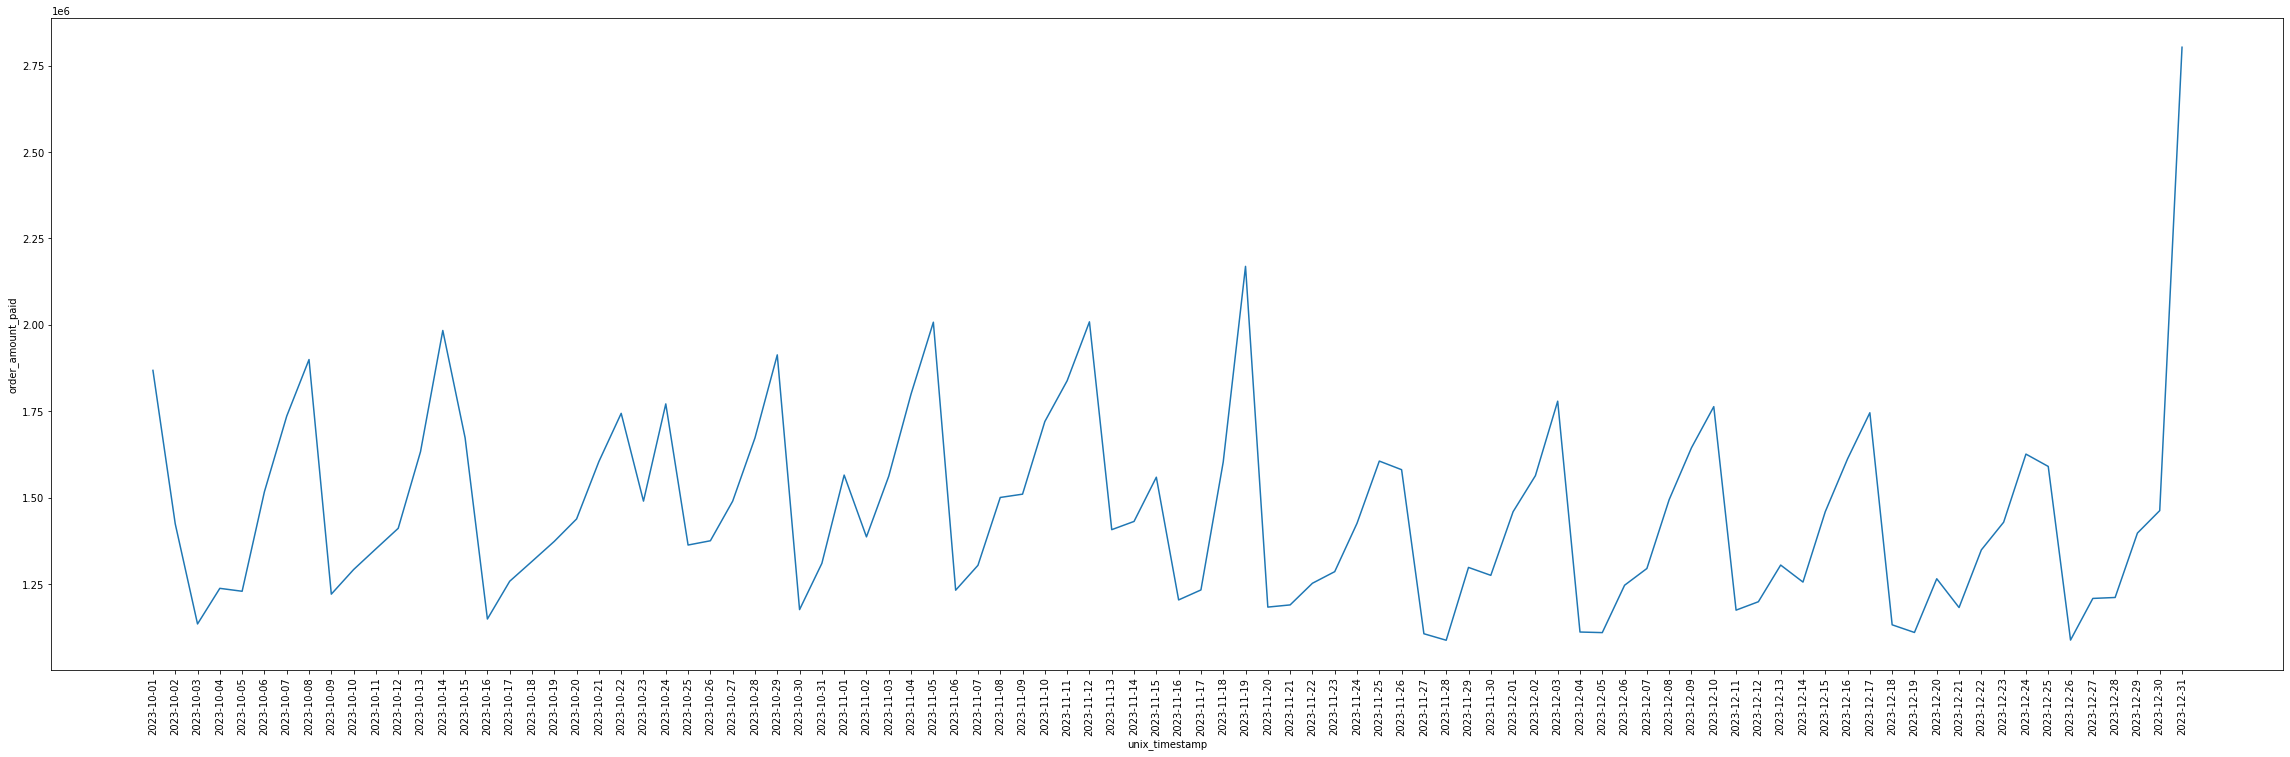

In [20]:
# Create a line plot
plt.gcf().set_size_inches((40, 12))
ax = sns.lineplot(x='unix_timestamp', y='order_amount_paid', data=gg)
ax.set_xticklabels(gg['unix_timestamp'], rotation=90)
plt.show()

In [35]:
gg.unix_timestamp = pd.to_datetime(gg.unix_timestamp)
gg

,unix_timestamp,product_quantity,order_delivery_fee,order_taxes,order_membership_fee,order_discount,order_membership_discount,order_amount_paid
0,2023-10-01,12630.0,51842.07,47250.69,2778.0,202924.71,4303.56,1868319.09
1,2023-10-02,10131.0,39238.94,34067.07,1809.0,159798.40,2928.75,1424287.50
2,2023-10-03,7984.0,34843.92,28431.08,2731.0,132406.41,1956.27,1134614.69
3,2023-10-04,8579.0,32777.35,30464.13,1740.0,151256.42,2476.16,1237660.25
4,2023-10-05,8553.0,34922.86,31934.69,3608.0,174713.21,3976.58,1229216.41
...,...,...,...,...,...,...,...,...
87,2023-12-27,8192.0,18782.21,30575.72,2211.0,148122.62,4598.08,1208465.57
88,2023-12-28,8211.0,20901.72,30564.22,1956.0,158544.30,3522.60,1211212.38
89,2023-12-29,9095.0,22725.86,34974.32,2210.0,168346.14,3962.06,1397535.28
90,2023-12-30,10168.0,21699.37,38530.20,2031.0,181148.91,5124.89,1462578.25


In [36]:
aa = gg[['unix_timestamp','order_amount_paid']]
aa

,unix_timestamp,order_amount_paid
0,2023-10-01,1868319.09
1,2023-10-02,1424287.50
2,2023-10-03,1134614.69
3,2023-10-04,1237660.25
4,2023-10-05,1229216.41
...,...,...
87,2023-12-27,1208465.57
88,2023-12-28,1211212.38
89,2023-12-29,1397535.28
90,2023-12-30,1462578.25


In [37]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf

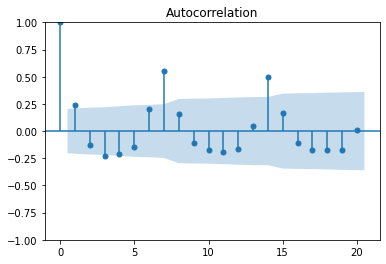

In [38]:
# aa = gg[['unix_timestamp','order_amount_paid']]
aa = gg

# aa['unix_timestamp'] = pd.to_datetime(aa['unix_timestamp'])
aa = aa.set_index('unix_timestamp')

# Plot ACF
plot_acf(aa['order_amount_paid'])
plt.show()

In [39]:
aa

,product_quantity,order_delivery_fee,order_taxes,order_membership_fee,order_discount,order_membership_discount,order_amount_paid
unix_timestamp,,,,,,,
2023-10-01,12630.0,51842.07,47250.69,2778.0,202924.71,4303.56,1868319.09
2023-10-02,10131.0,39238.94,34067.07,1809.0,159798.40,2928.75,1424287.50
2023-10-03,7984.0,34843.92,28431.08,2731.0,132406.41,1956.27,1134614.69
2023-10-04,8579.0,32777.35,30464.13,1740.0,151256.42,2476.16,1237660.25
2023-10-05,8553.0,34922.86,31934.69,3608.0,174713.21,3976.58,1229216.41
...,...,...,...,...,...,...,...
2023-12-27,8192.0,18782.21,30575.72,2211.0,148122.62,4598.08,1208465.57
2023-12-28,8211.0,20901.72,30564.22,1956.0,158544.30,3522.60,1211212.38
2023-12-29,9095.0,22725.86,34974.32,2210.0,168346.14,3962.06,1397535.28


In [238]:
# aa = pd.DataFrame(gg[['unix_timestamp','order_amount_paid']])
num = 0
days_predict  = 91
aa = gg[['unix_timestamp', 'order_amount_paid']][:len(gg)-num]

aa_test = gg[['unix_timestamp', 'order_amount_paid']][len(gg)-num:]

aa['unix_timestamp'] = pd.to_datetime(aa['unix_timestamp'])
aa.set_index('unix_timestamp', inplace=True)
aa = aa.asfreq('D')

# Fit ARIMA model
model = ARIMA(aa, order=(15,0,3))  # Example order, you can adjust this
model_fit = model.fit()

# Forecast for the next 90 days
forecast = model_fit.forecast(steps=days_predict)

# Print the forecasted values
forecast = pd.DataFrame(forecast).reset_index().rename(columns={'index':  'unix_timestamp'})
forecast

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


,unix_timestamp,predicted_mean
0,2024-01-01,1.847418e+06
1,2024-01-02,1.138389e+06
2,2024-01-03,1.263641e+06
3,2024-01-04,1.207260e+06
4,2024-01-05,1.196025e+06
...,...,...
86,2024-03-27,1.329696e+06
87,2024-03-28,1.342603e+06
88,2024-03-29,1.340923e+06
89,2024-03-30,1.357850e+06


In [239]:
ggg = pd.concat([gg[['unix_timestamp', 'order_amount_paid']].rename(columns={'order_amount_paid':  'predicted_mean'}), forecast])

In [240]:
ggg

,unix_timestamp,predicted_mean
0,2023-10-01,1.868319e+06
1,2023-10-02,1.424288e+06
2,2023-10-03,1.134615e+06
3,2023-10-04,1.237660e+06
4,2023-10-05,1.229216e+06
...,...,...
86,2024-03-27,1.329696e+06
87,2024-03-28,1.342603e+06
88,2024-03-29,1.340923e+06
89,2024-03-30,1.357850e+06


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


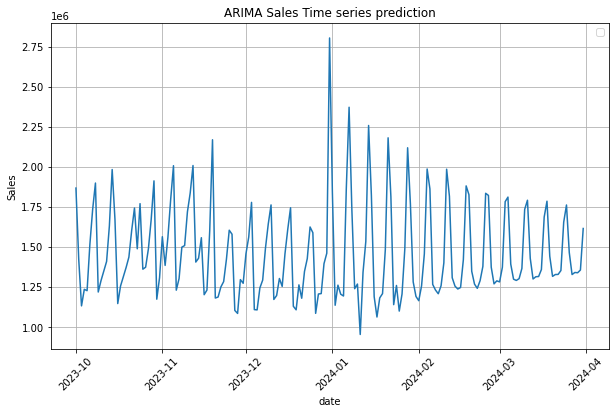

In [243]:
# Plotting
plt.figure(figsize=(10, 6))
# plt.plot(gg['unix_timestamp'], ggg['order_amount_paid'], label='Actual')
plt.plot(ggg['unix_timestamp'], ggg['predicted_mean'])

plt.xlabel('date')
plt.ylabel('Sales')
plt.title('ARIMA Sales Time series prediction')

plt.xticks(rotation=45)  # Rotate x ticks by 45 degrees
plt.legend()
plt.grid(True)
plt.show()

In [244]:
forecast.unix_timestamp = forecast.unix_timestamp.astype('str').apply(lambda x: x.split('-')[0] + '-' + x.split('-')[1])

In [245]:
sales_predict = forecast.groupby('unix_timestamp').sum().reset_index()
sales_predict.predicted_mean = sales_predict.predicted_mean.astype('int')
sales_predict

,unix_timestamp,predicted_mean
0,2024-01,45754997
1,2024-02,42230812
2,2024-03,45296138


In [ ]:
# aa = pd.DataFrame(gg[['unix_timestamp','order_amount_paid']])
num = 31
days_predict  = 31
aa = gg[['unix_timestamp', 'order_amount_paid']][:len(gg)-num]

aa_test = gg[['unix_timestamp', 'order_amount_paid']][len(gg)-num:]

aa['unix_timestamp'] = pd.to_datetime(aa['unix_timestamp'])
aa.set_index('unix_timestamp', inplace=True)
aa = aa.asfreq('D')

# Fit ARIMA model
model = ARIMA(aa, order=(5,1,1))  # Example order, you can adjust this
model_fit = model.fit()

print(model_fit.summary())
# Forecast for the next 90 days
forecast = model_fit.forecast(steps=days_predict)


# Print the forecasted values
forecast = pd.DataFrame(forecast).reset_index().rename(columns={'index':  'unix_timestamp'})

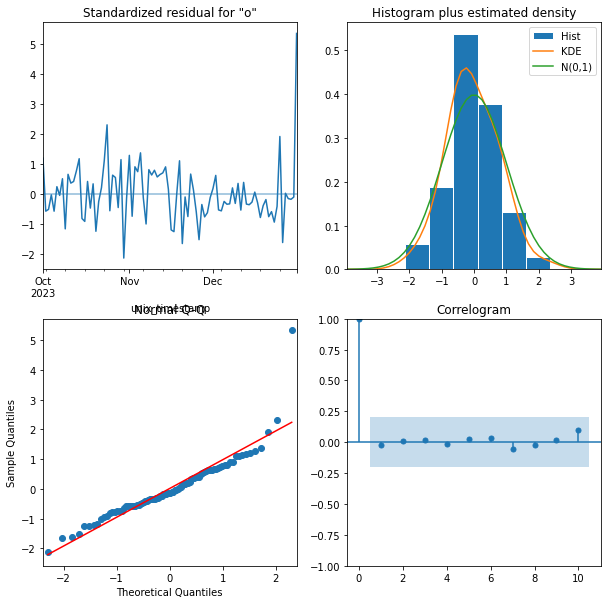

In [140]:
model_fit.plot_diagnostics(figsize=(10, 10))
plt.show()

In [ ]:
gg['unix_timestamp'][0]

In [ ]:
gg = pd.merge(gg, forecast, on='unix_timestamp', how='cross')

In [201]:
ggg = pd.concat([gg[['unix_timestamp', 'order_amount_paid']].rename(columns={'order_amount_paid':  'predicted_mean'}), forecast])

In [202]:
ggg

,unix_timestamp,predicted_mean
0,2023-10-01,1.868319e+06
1,2023-10-02,1.424288e+06
2,2023-10-03,1.134615e+06
3,2023-10-04,1.237660e+06
4,2023-10-05,1.229216e+06
...,...,...
86,2024-03-27,1.329066e+06
87,2024-03-28,1.288214e+06
88,2024-03-29,1.351177e+06
89,2024-03-30,1.287770e+06


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


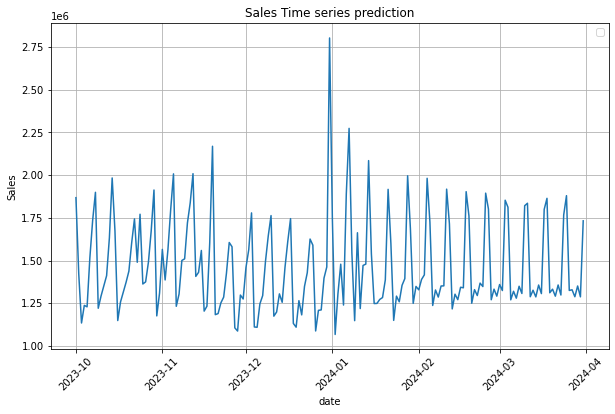

In [203]:
# Plotting
plt.figure(figsize=(10, 6))
# plt.plot(gg['unix_timestamp'], ggg['order_amount_paid'], label='Actual')
plt.plot(ggg['unix_timestamp'], ggg['predicted_mean'])

plt.xlabel('date')
plt.ylabel('Sales')
plt.title('Sales Time series prediction')

plt.xticks(rotation=45)  # Rotate x ticks by 45 degrees
plt.legend()
plt.grid(True)
plt.show()

In [198]:
forecast.unix_timestamp = forecast.unix_timestamp.astype('str').apply(lambda x: x.split('-')[0] + '-' + x.split('-')[1])

In [199]:
sales_predict = forecast.groupby('unix_timestamp').sum().reset_index()
sales_predict.predicted_mean = sales_predict.predicted_mean.astype('int')
sales_predict

,unix_timestamp,predicted_mean
0,2024-01,47486807
1,2024-02,41217808
2,2024-03,46746774


In [72]:
yup = gg
yup.unix_timestamp = yup.unix_timestamp.astype('str').apply(lambda x: x.split('-')[0] + '-' + x.split('-')[1])
yup.groupby('unix_timestamp').sum().reset_index()

,unix_timestamp,product_quantity,order_delivery_fee,order_taxes,order_membership_fee,order_discount,order_membership_discount,order_amount_paid
0,2023-10,315826.0,1144950.82,1147021.705,86100.0,5411089.54,108764.22,46058147.37
1,2023-11,294162.0,992487.39,1093513.000,73434.0,4930659.25,106045.76,44335482.71
2,2023-12,292370.0,746365.78,1120026.240,75930.0,4980321.33,151975.30,44073781.08


KeyError: 'predicted_mean'

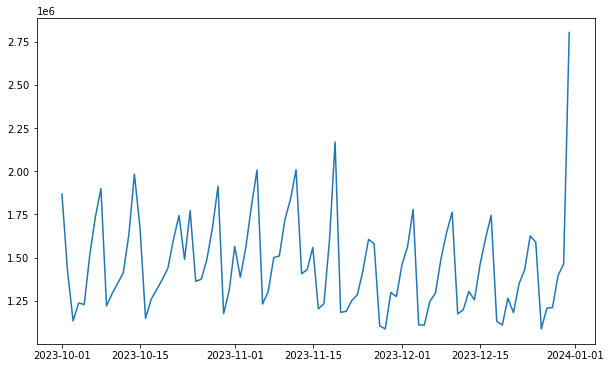

In [45]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(gg['unix_timestamp'], gg['order_amount_paid'], label='Actual')
plt.plot(gg['unix_timestamp'], gg['predicted_mean'], label='Predicted')

plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Two Line Plots with Same X Axis')

plt.xticks(rotation=45)  # Rotate x ticks by 45 degrees
plt.legend()
plt.grid(True)
plt.show()

In [75]:
gg

,unix_timestamp,product_quantity,order_delivery_fee,order_taxes,order_membership_fee,order_discount,order_membership_discount,order_amount_paid
0,2023-10-01,12630.0,51842.07,47250.69,2778.0,202924.71,4303.56,1868319.09
1,2023-10-02,10131.0,39238.94,34067.07,1809.0,159798.40,2928.75,1424287.50
2,2023-10-03,7984.0,34843.92,28431.08,2731.0,132406.41,1956.27,1134614.69
3,2023-10-04,8579.0,32777.35,30464.13,1740.0,151256.42,2476.16,1237660.25
4,2023-10-05,8553.0,34922.86,31934.69,3608.0,174713.21,3976.58,1229216.41
...,...,...,...,...,...,...,...,...
87,2023-12-27,8192.0,18782.21,30575.72,2211.0,148122.62,4598.08,1208465.57
88,2023-12-28,8211.0,20901.72,30564.22,1956.0,158544.30,3522.60,1211212.38
89,2023-12-29,9095.0,22725.86,34974.32,2210.0,168346.14,3962.06,1397535.28
90,2023-12-30,10168.0,21699.37,38530.20,2031.0,181148.91,5124.89,1462578.25


In [79]:
gg['year'] = gg['unix_timestamp'].apply(lambda x: x.split('-')[0]).astype('int')
gg['month'] = gg['unix_timestamp'].apply(lambda x: x.split('-')[1]).astype('int')
gg['day'] = gg['unix_timestamp'].apply(lambda x: x.split('-')[2]).astype('int')
gg

,unix_timestamp,product_quantity,order_delivery_fee,order_taxes,order_membership_fee,order_discount,order_membership_discount,order_amount_paid,year,month,day
0,2023-10-01,12630.0,51842.07,47250.69,2778.0,202924.71,4303.56,1868319.09,2023,10,1
1,2023-10-02,10131.0,39238.94,34067.07,1809.0,159798.40,2928.75,1424287.50,2023,10,2
2,2023-10-03,7984.0,34843.92,28431.08,2731.0,132406.41,1956.27,1134614.69,2023,10,3
3,2023-10-04,8579.0,32777.35,30464.13,1740.0,151256.42,2476.16,1237660.25,2023,10,4
4,2023-10-05,8553.0,34922.86,31934.69,3608.0,174713.21,3976.58,1229216.41,2023,10,5
...,...,...,...,...,...,...,...,...,...,...,...
87,2023-12-27,8192.0,18782.21,30575.72,2211.0,148122.62,4598.08,1208465.57,2023,12,27
88,2023-12-28,8211.0,20901.72,30564.22,1956.0,158544.30,3522.60,1211212.38,2023,12,28
89,2023-12-29,9095.0,22725.86,34974.32,2210.0,168346.14,3962.06,1397535.28,2023,12,29
90,2023-12-30,10168.0,21699.37,38530.20,2031.0,181148.91,5124.89,1462578.25,2023,12,30


In [95]:
xg = gg[['unix_timestamp', 'year',	'month',	'day', 'order_amount_paid']]
xg

,unix_timestamp,year,month,day,order_amount_paid
0,2023-10-01,2023,10,1,1868319.09
1,2023-10-02,2023,10,2,1424287.50
2,2023-10-03,2023,10,3,1134614.69
3,2023-10-04,2023,10,4,1237660.25
4,2023-10-05,2023,10,5,1229216.41
...,...,...,...,...,...
87,2023-12-27,2023,12,27,1208465.57
88,2023-12-28,2023,12,28,1211212.38
89,2023-12-29,2023,12,29,1397535.28
90,2023-12-30,2023,12,30,1462578.25


In [134]:

import pandas as pd
import numpy as np
from xgboost import XGBRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

# # Sample data
# data = {'date': pd.date_range(start='2022-01-01', periods=100, freq='M'),
#         'sales': np.random.randint(1000, 5000, size=100)}

# df = pd.DataFrame(data)

# Feature engineering
# df['month'] = df['date'].dt.month
# df['quarter'] = df['date'].dt.quarter
# df['year'] = df['date'].dt.year

# Split the data
X = xg[['year', 'month', 'day']]
y = xg['order_amount_paid']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the XGBoost model
model = XGBRegressor()
model.fit(X, y)

# Make predictions for the next 3 months
last_date = pd.to_datetime(xg['unix_timestamp']).max()
next_3_months = pd.date_range(start=last_date + pd.DateOffset(days=1), periods=91, freq='D')
future_data = pd.DataFrame({'date': next_3_months,
              'year': next_3_months.year,
              'month': next_3_months.month,
              'day': next_3_months.day})

predictions = model.predict(future_data[['year', 'month', 'day']])
future_data['predicted_sales'] = predictions

print(future_data[['date', 'predicted_sales']])

         date  predicted_sales
0  2024-01-01      1868239.625
1  2024-01-02      1424134.250
2  2024-01-03      1134865.750
3  2024-01-04      1237326.000
4  2024-01-05      1230662.375
..        ...              ...
86 2024-03-27      1489902.125
87 2024-03-28      1673234.125
88 2024-03-29      1912614.250
89 2024-03-30      1176374.375
90 2024-03-31      1309956.750

[91 rows x 2 columns]


In [135]:
ggg2 = pd.concat([gg[['unix_timestamp', 'order_amount_paid']].rename(columns={'unix_timestamp': 'date', 'order_amount_paid':  'predicted_sales'}), future_data])

In [136]:
ggg2

,date,predicted_sales,year,month,day
0,2023-10-01,1868319.090,NaN,NaN,NaN
1,2023-10-02,1424287.500,NaN,NaN,NaN
2,2023-10-03,1134614.690,NaN,NaN,NaN
3,2023-10-04,1237660.250,NaN,NaN,NaN
4,2023-10-05,1229216.410,NaN,NaN,NaN
...,...,...,...,...,...
86,2024-03-27,1489902.125,2024.0,3.0,27.0
87,2024-03-28,1673234.125,2024.0,3.0,28.0
88,2024-03-29,1912614.250,2024.0,3.0,29.0
89,2024-03-30,1176374.375,2024.0,3.0,30.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


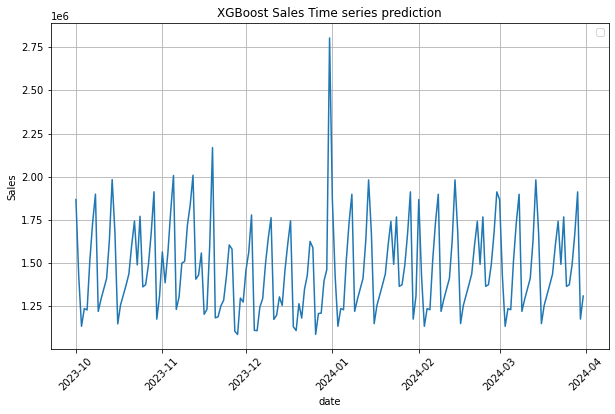

In [139]:
# Plotting
plt.figure(figsize=(10, 6))
# plt.plot(gg['unix_timestamp'], ggg['order_amount_paid'], label='Actual')
plt.plot(ggg2['date'], ggg2['predicted_sales'])

plt.xlabel('date')
plt.ylabel('Sales')
plt.title('XGBoost Sales Time series prediction')

plt.xticks(rotation=45)  # Rotate x ticks by 45 degrees
plt.legend()
plt.grid(True)
plt.show()

In [133]:
future_data['date'] = future_data['date'].astype('str').apply(lambda x: x.split('-')[0] + '-' + x.split('-')[1])

sales_predict = future_data[['date', 'predicted_sales']].groupby('date').sum().reset_index()
sales_predict.predicted_sales = sales_predict.predicted_sales.astype('int')
sales_predict

,date,predicted_sales
0,2024-01,46058740
1,2024-02,43572408
2,2024-03,46058740


In [ ]:
df

In [91]:
next_3_months = pd.date_range(start=pd.to_datetime('2023-12-31') + pd.DateOffset(days=1), periods=91, freq='D')
pd.DataFrame({'date': next_3_months,
              'year': next_3_months.year,
              'month': next_3_months.month,
              'day': next_3_months.day})

,date,year,month,day
0,2024-01-01,2024,1,1
1,2024-01-02,2024,1,2
2,2024-01-03,2024,1,3
3,2024-01-04,2024,1,4
4,2024-01-05,2024,1,5
...,...,...,...,...
86,2024-03-27,2024,3,27
87,2024-03-28,2024,3,28
88,2024-03-29,2024,3,29
89,2024-03-30,2024,3,30
